# Plot Fermi orbit in timespan on a map

### Robert Cameron, June 2021

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime as dt
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import numpy as np
%matplotlib notebook

/Users/rac/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/rac/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/rac/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#cfeature.COLORS['water']

In [3]:
# define the SAA region
saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]

# define the candidate new LAT SAA region
newlon = [ 33.9, -30.0, -36.0, -42.0, -58.8, -97.5, -98.5, -86.1, -60.0, -40.0, -20.0, 0.0, 33.9]
newlat = [-30.0, 3.0, 4.6, 4.6, 0.7, -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0]

In [4]:
# data file directory: 
path = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/ephem/"

# read ASCII file of Fermi predicted ephemeris
file = "xGLAST_EPH_2021165_2021207_00.txt"
# file format:
#DOY YYYY-MM-DD hh:mm:ss   X(km)       Y(km)       Z(km)  Lat(deg) Lon(deg) RA(deg) Dec(deg)
#206 2021-07-25 23:51:00 6084.823402 2975.864642 1383.357799 11.720 84.693 111.167 -22.393

t = Table.read(path+file, format='ascii')
#t['Lat(deg)'], t

In [5]:
tstart = dt.datetime.strptime("2021-06-23 05:49:00", "%Y-%m-%d %H:%M:%S")
tstart

datetime.datetime(2021, 6, 23, 5, 49)

In [6]:
elat = t['Lat(deg)']
elon = t['Lon(deg)']
doy = t['DOY']
ymd = t['YYYY-MM-DD']
hms = t['HH:MM:SS']

for i in range(len(ymd)):
    tdt = dt.datetime.strptime(ymd[i]+hms[i],"%Y-%m-%d%H:%M:%S")
    if (tdt >= tstart):
        ibeg = i
        break
#dnt = [dt.datetime.strptime(ymd[i]+hms[i],"%Y-%m-%d%H:%M:%S") for i in range(len(ymd))]

#ibeg = 400
ilen = 205
iend = ibeg+ilen
plat = elat[ibeg:iend]
plon = elon[ibeg:iend]
pdoy = doy[ibeg:iend]
pymd = ymd[ibeg:iend]
phms = hms[ibeg:iend]
#elat, elon

imax = [i for i,val in enumerate(plat) if val>25.65]
imin = [i for i,val in enumerate(plat) if val<-25.65]
izer = [i for i,val in enumerate(plat) if abs(val) < 1]
imax.append(0)
imin.append(ilen-1)
plat0 = plat[izer]
plon0 = plon[izer]
pdoy0 = pdoy[izer]
pymd0 = pymd[izer]
phms0 = phms[izer]
plat1 = plat[imin]
plon1 = plon[imin]
pdoy1 = pdoy[imin]
pymd1 = pymd[imin]
phms1 = phms[imin]
plat2 = plat[imax]
plon2 = plon[imax]
pdoy2 = pdoy[imax]
pymd2 = pymd[imax]
phms2 = phms[imax]

#imax, imin, plat0, plon0, plat1, plon1, plat2, plon

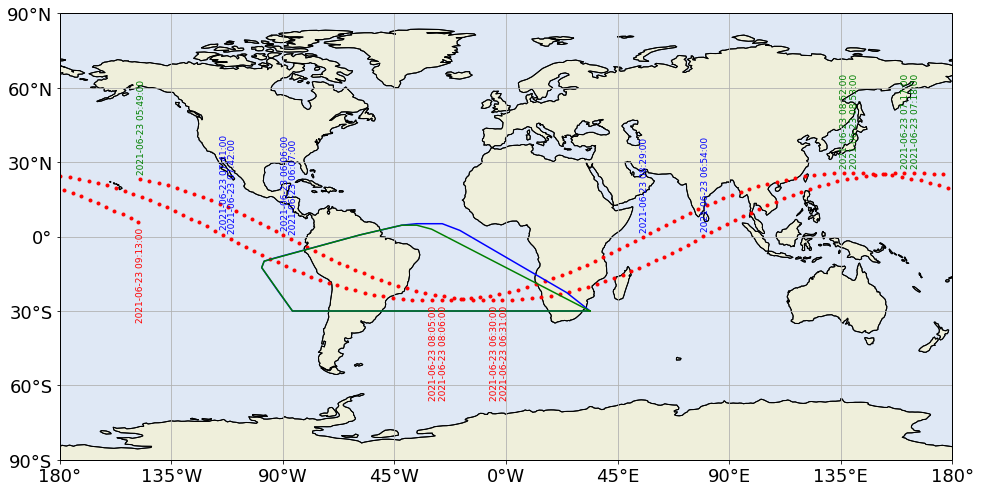

In [7]:
plt.figure(figsize = [16, 9])
plt.rc('font', size = 18)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN,alpha=0.3)
ax.add_feature(cfeature.COASTLINE)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# draw parallels and meridians
longrid = np.arange(-180.,181.,45.)
latgrid = np.arange(-90.,91.,30.)
ax.gridlines(xlocs=longrid,ylocs=latgrid)
ax.set_xticks(longrid, crs=ccrs.PlateCarree())
ax.set_yticks(latgrid, crs=ccrs.PlateCarree())

plt.plot(plon,plat, 'r.')
plt.plot(saalon,saalat,color='b',linewidth=1.5)
plt.plot(newlon,newlat,color='g',linewidth=1.5)

for i in range(len(plat0)):
    label = pymd0[i]+" "+phms0[i]
    plt.annotate(label, # this is the text
                 (plon0[i],plat0[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(2,5), # distance from text to points (x,y)
                 rotation=90,  # text is vertical, going up
                 size=9, color='b', # text size
                 ha='center', va='bottom') # horizontal alignment can be left, right or center
for i in range(len(plat1)):
    label = pymd1[i]+" "+phms1[i]
    plt.annotate(label, # this is the text
                 (plon1[i],plat1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(2,-5), # distance from text to points (x,y)
                 rotation=90,  # text is vertical, going up
                 size=9, color='r', # text size
                 ha='center', va='top') # horizontal alignment can be left, right or center
for i in range(len(plat2)):
    label = pymd2[i]+" "+phms2[i]
    plt.annotate(label, # this is the text
                 (plon2[i],plat2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(1,5), # distance from text to points (x,y)
                 rotation=90,  # text is vertical, going up
                 size=9, color='g', # text size
                 ha='center', va='bottom') # horizontal alignment can be left, right or center
